In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import csv
import statistics
from pandas.api.types import CategoricalDtype

In [2]:
names = open("cnames.tsv")
names1 = csv.reader(names, delimiter="\t")
seq_names = pd.DataFrame(names1)

new_header = seq_names.iloc[0]
seq_names= seq_names[1:] 
seq_names.columns = new_header 
seq_names['ID'] = seq_names['ID'].astype(str) + " " + seq_names['name'].astype(str)
seq_names['index'] = seq_names['index'].astype(int)

seq_names_original = seq_names.sort_values(by = "index")

In [3]:
alt_data2 = pd.DataFrame(np.load("1.1000G.EUR.QC.vcf.swap.ref_predictions.h5.seqclass_diffscores.npy")).iloc[:, 0:40]

In [4]:
labels = (seq_names_original["ID"].astype(str)).tolist()
labels_reordered = (seq_names["ID"].astype(str)).tolist()

In [5]:
alt_data2.columns = labels
alt_data2 = alt_data2[labels_reordered]

In [6]:
vector = np.max(np.abs(alt_data2), axis=1)
indices = np.argsort(-1*vector)

In [7]:
length_0_1 = round(0.1 * len(indices))
length_0_01 = round(0.01 * len(indices))                   

indices_0_1 = indices[0:length_0_1]
indices_0_01 = indices[0:length_0_01]                  

In [8]:
matrix_0_1 =  alt_data2.loc[indices_0_1]
matrix_0_01 =  alt_data2.loc[indices_0_01]

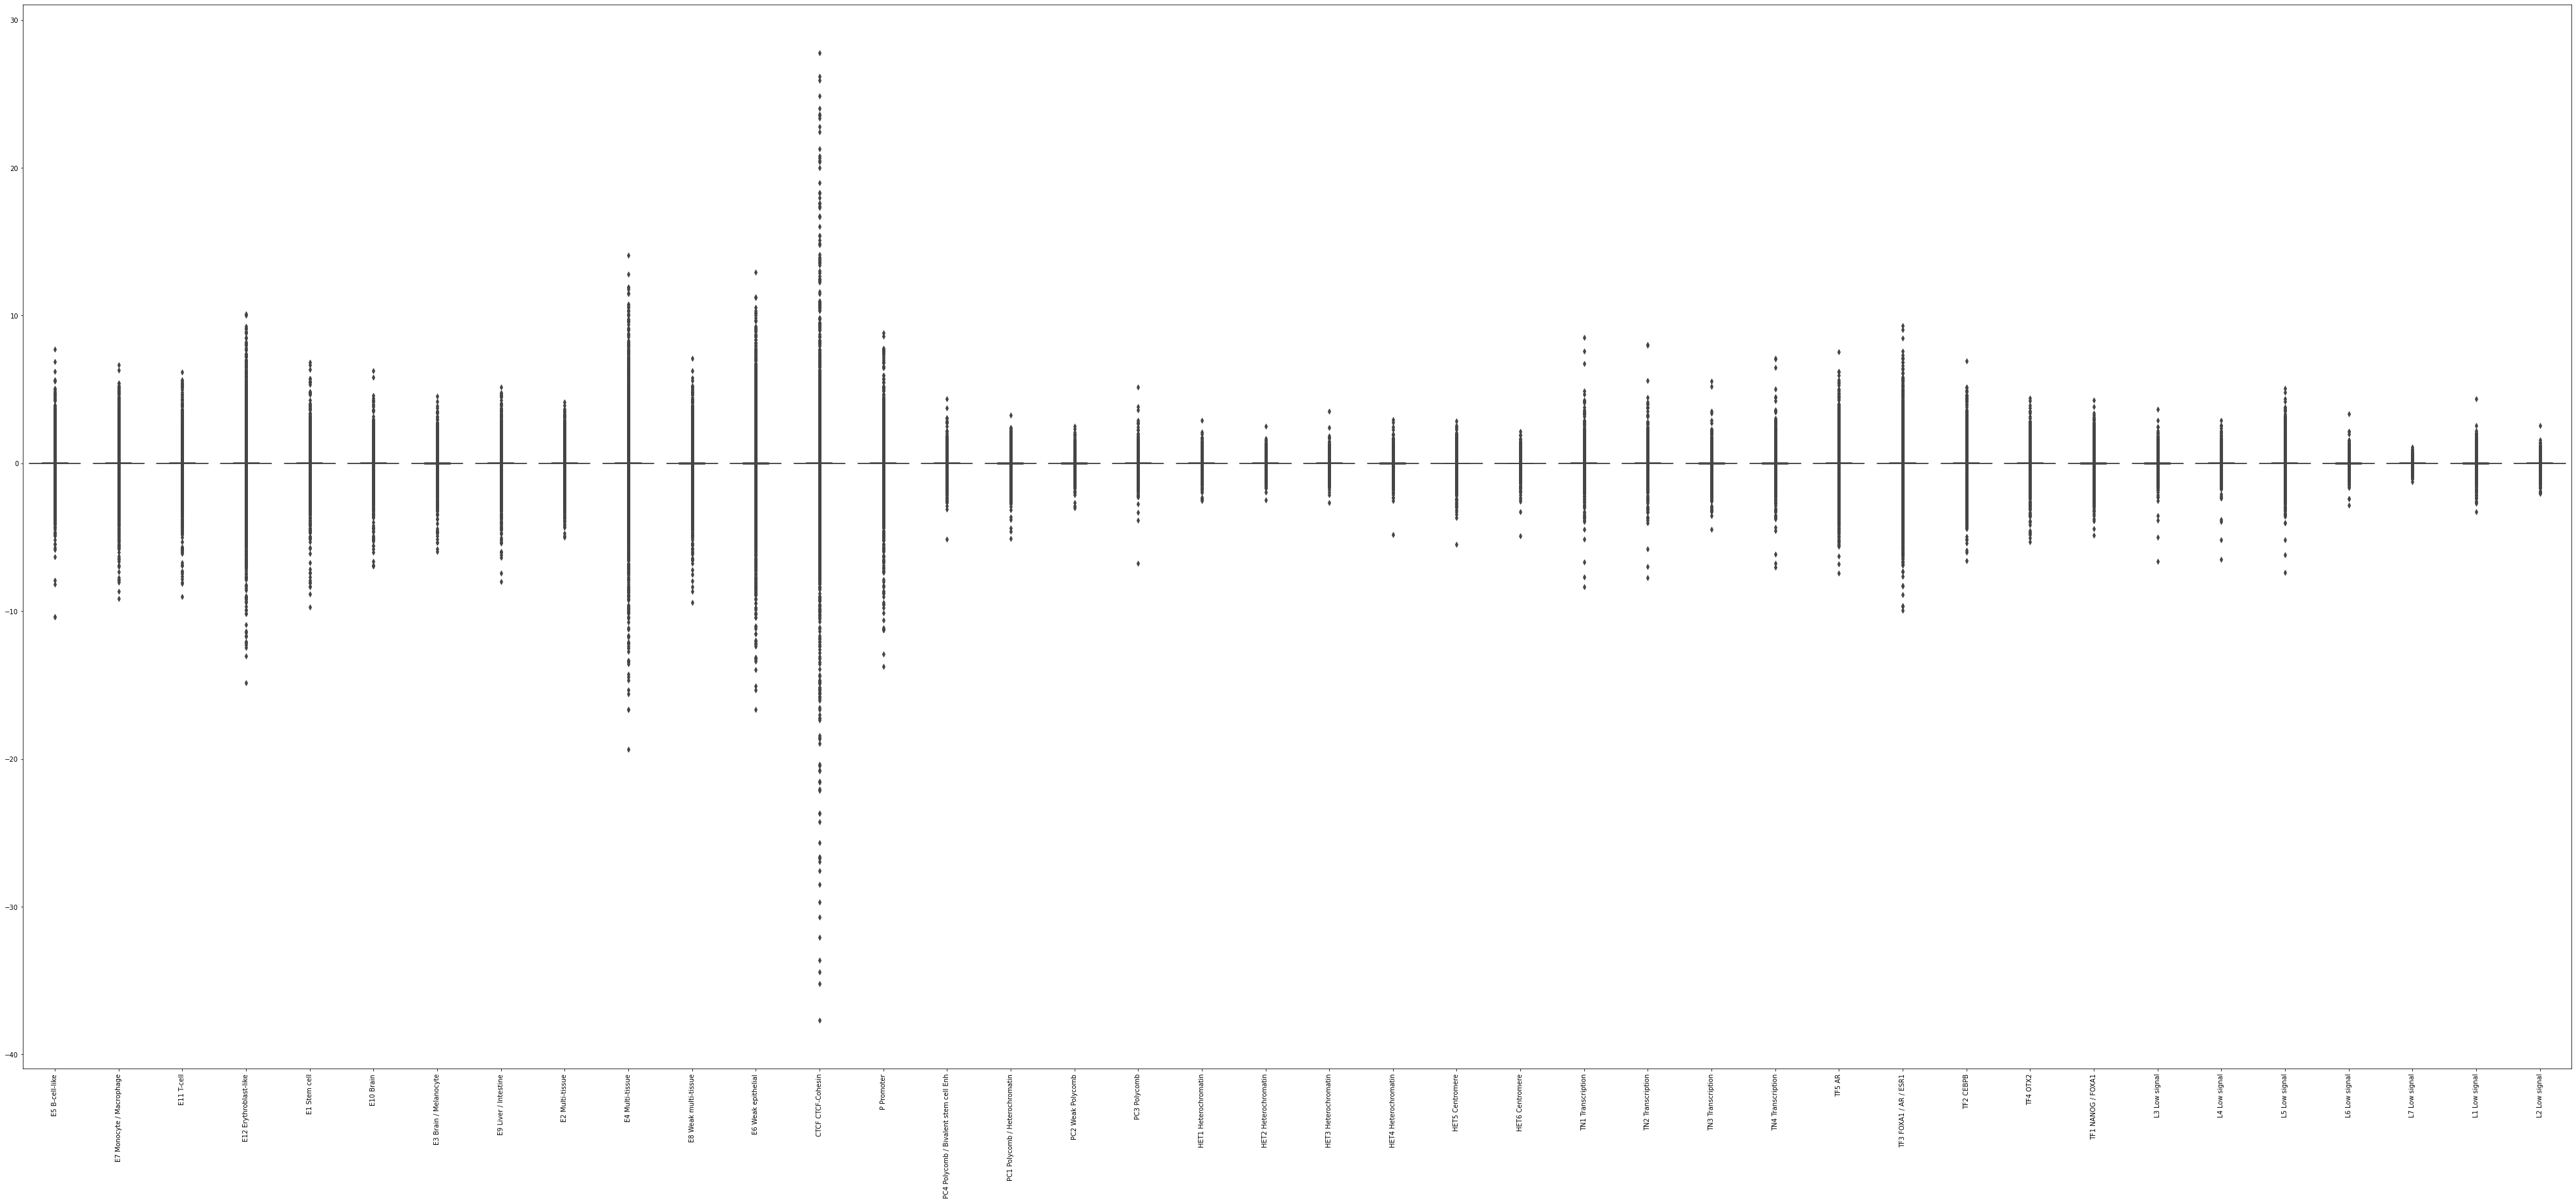

In [9]:
plt.figure(figsize=(70,30))
plt.xticks(rotation=90)
ax = sb.boxplot(data = alt_data2)

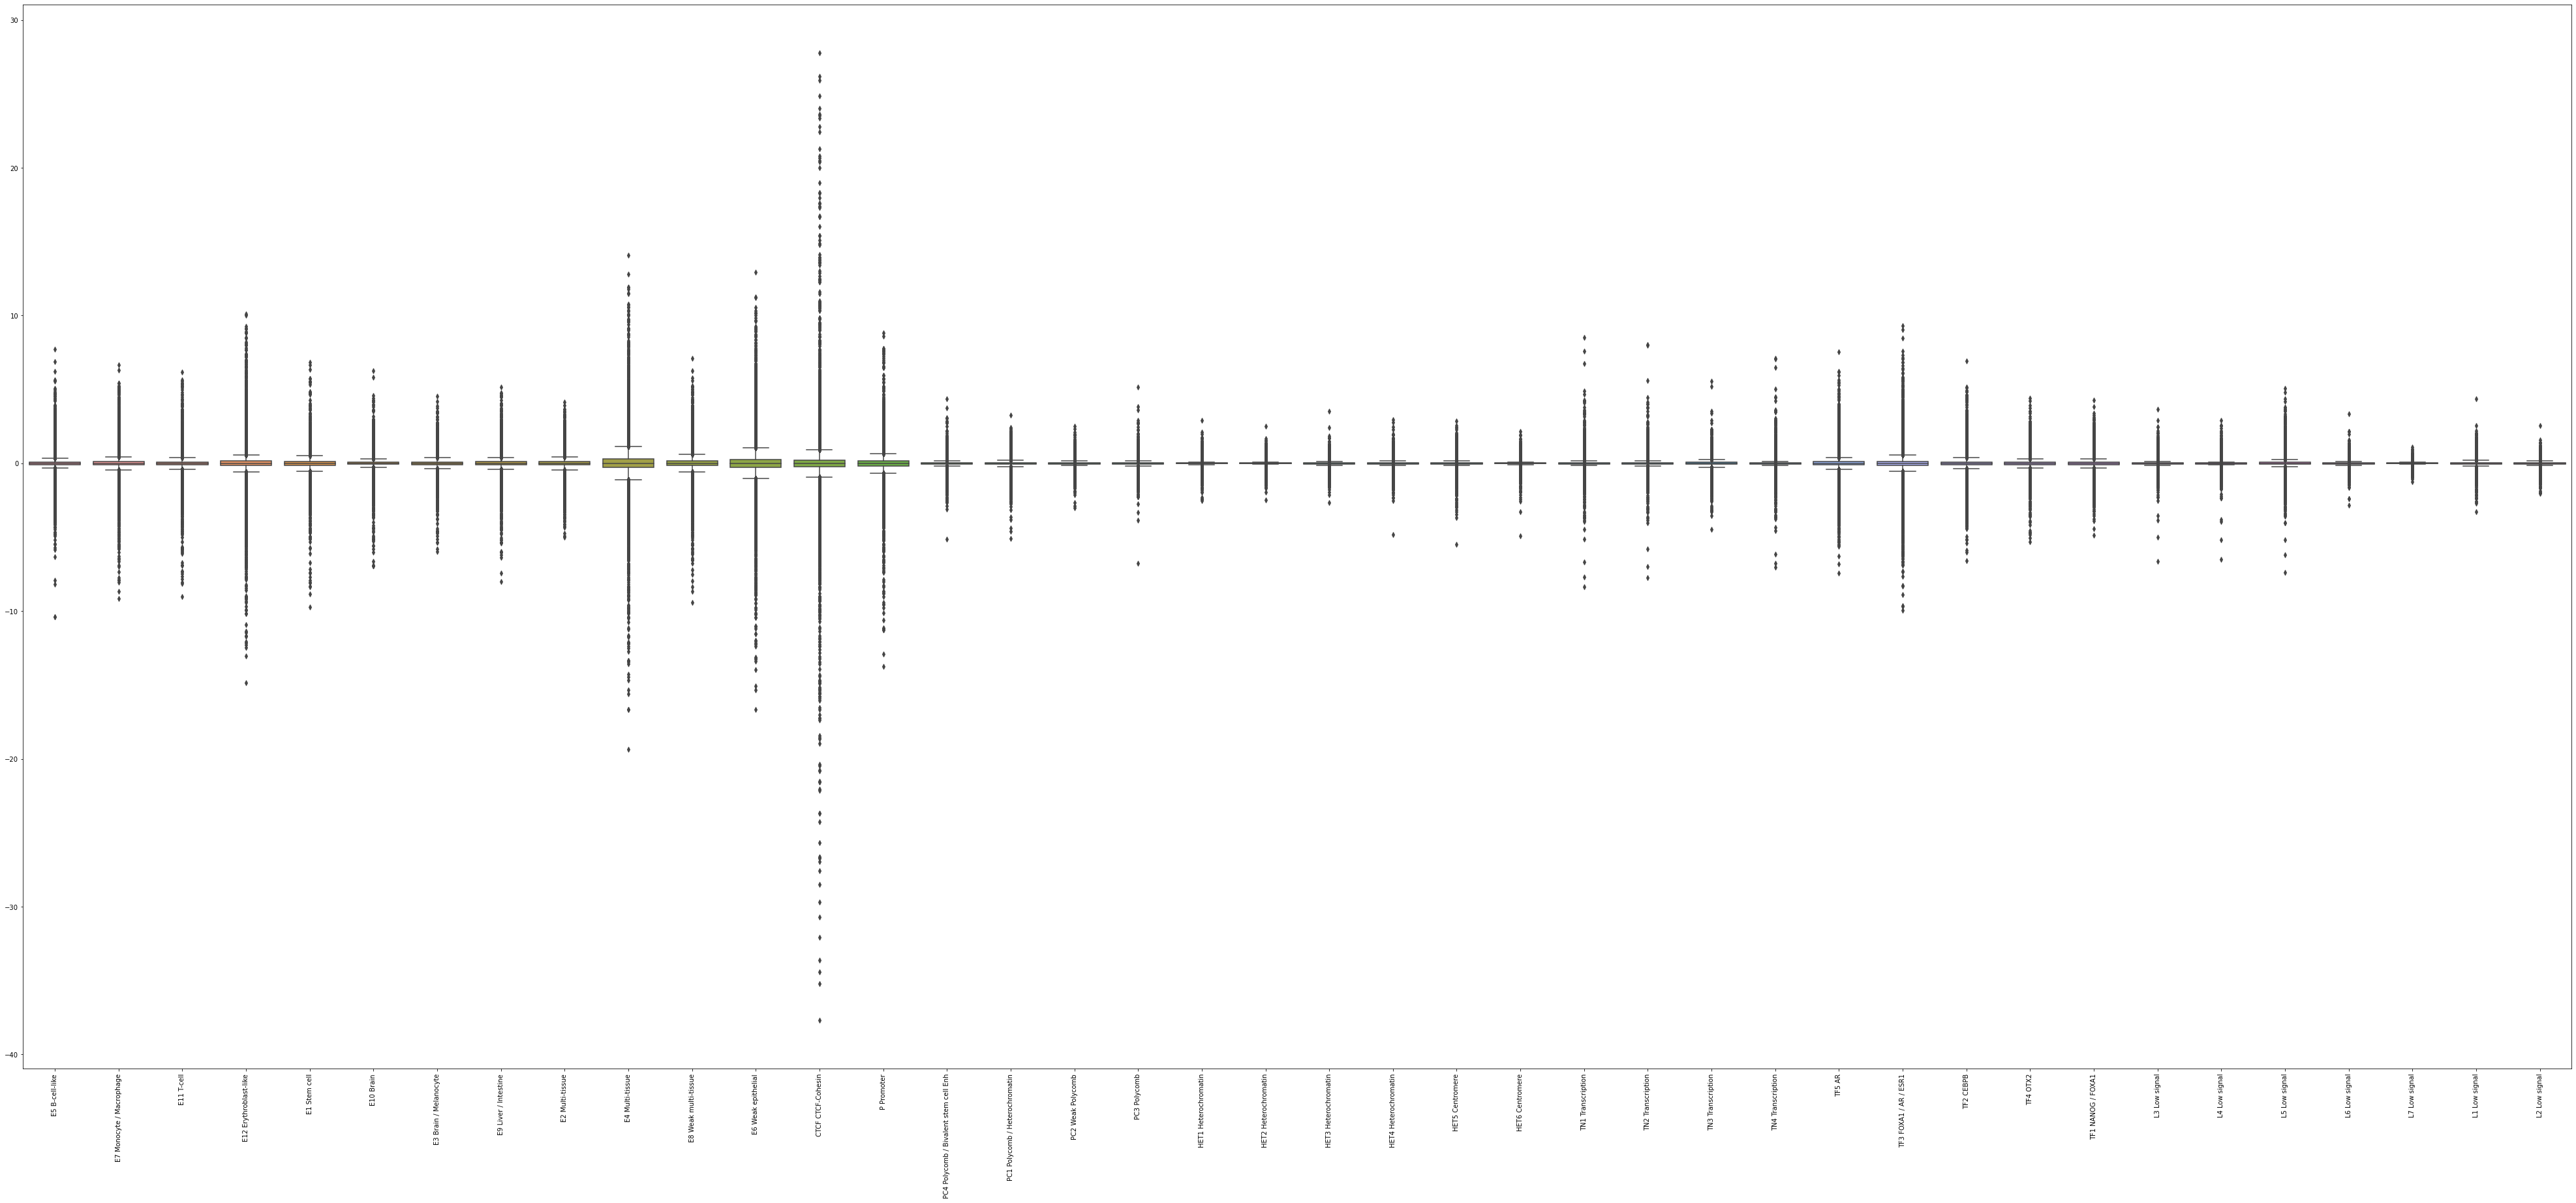

In [10]:
plt.figure(figsize=(70,30))
plt.xticks(rotation=90)
ax = sb.boxplot(data = matrix_0_1)

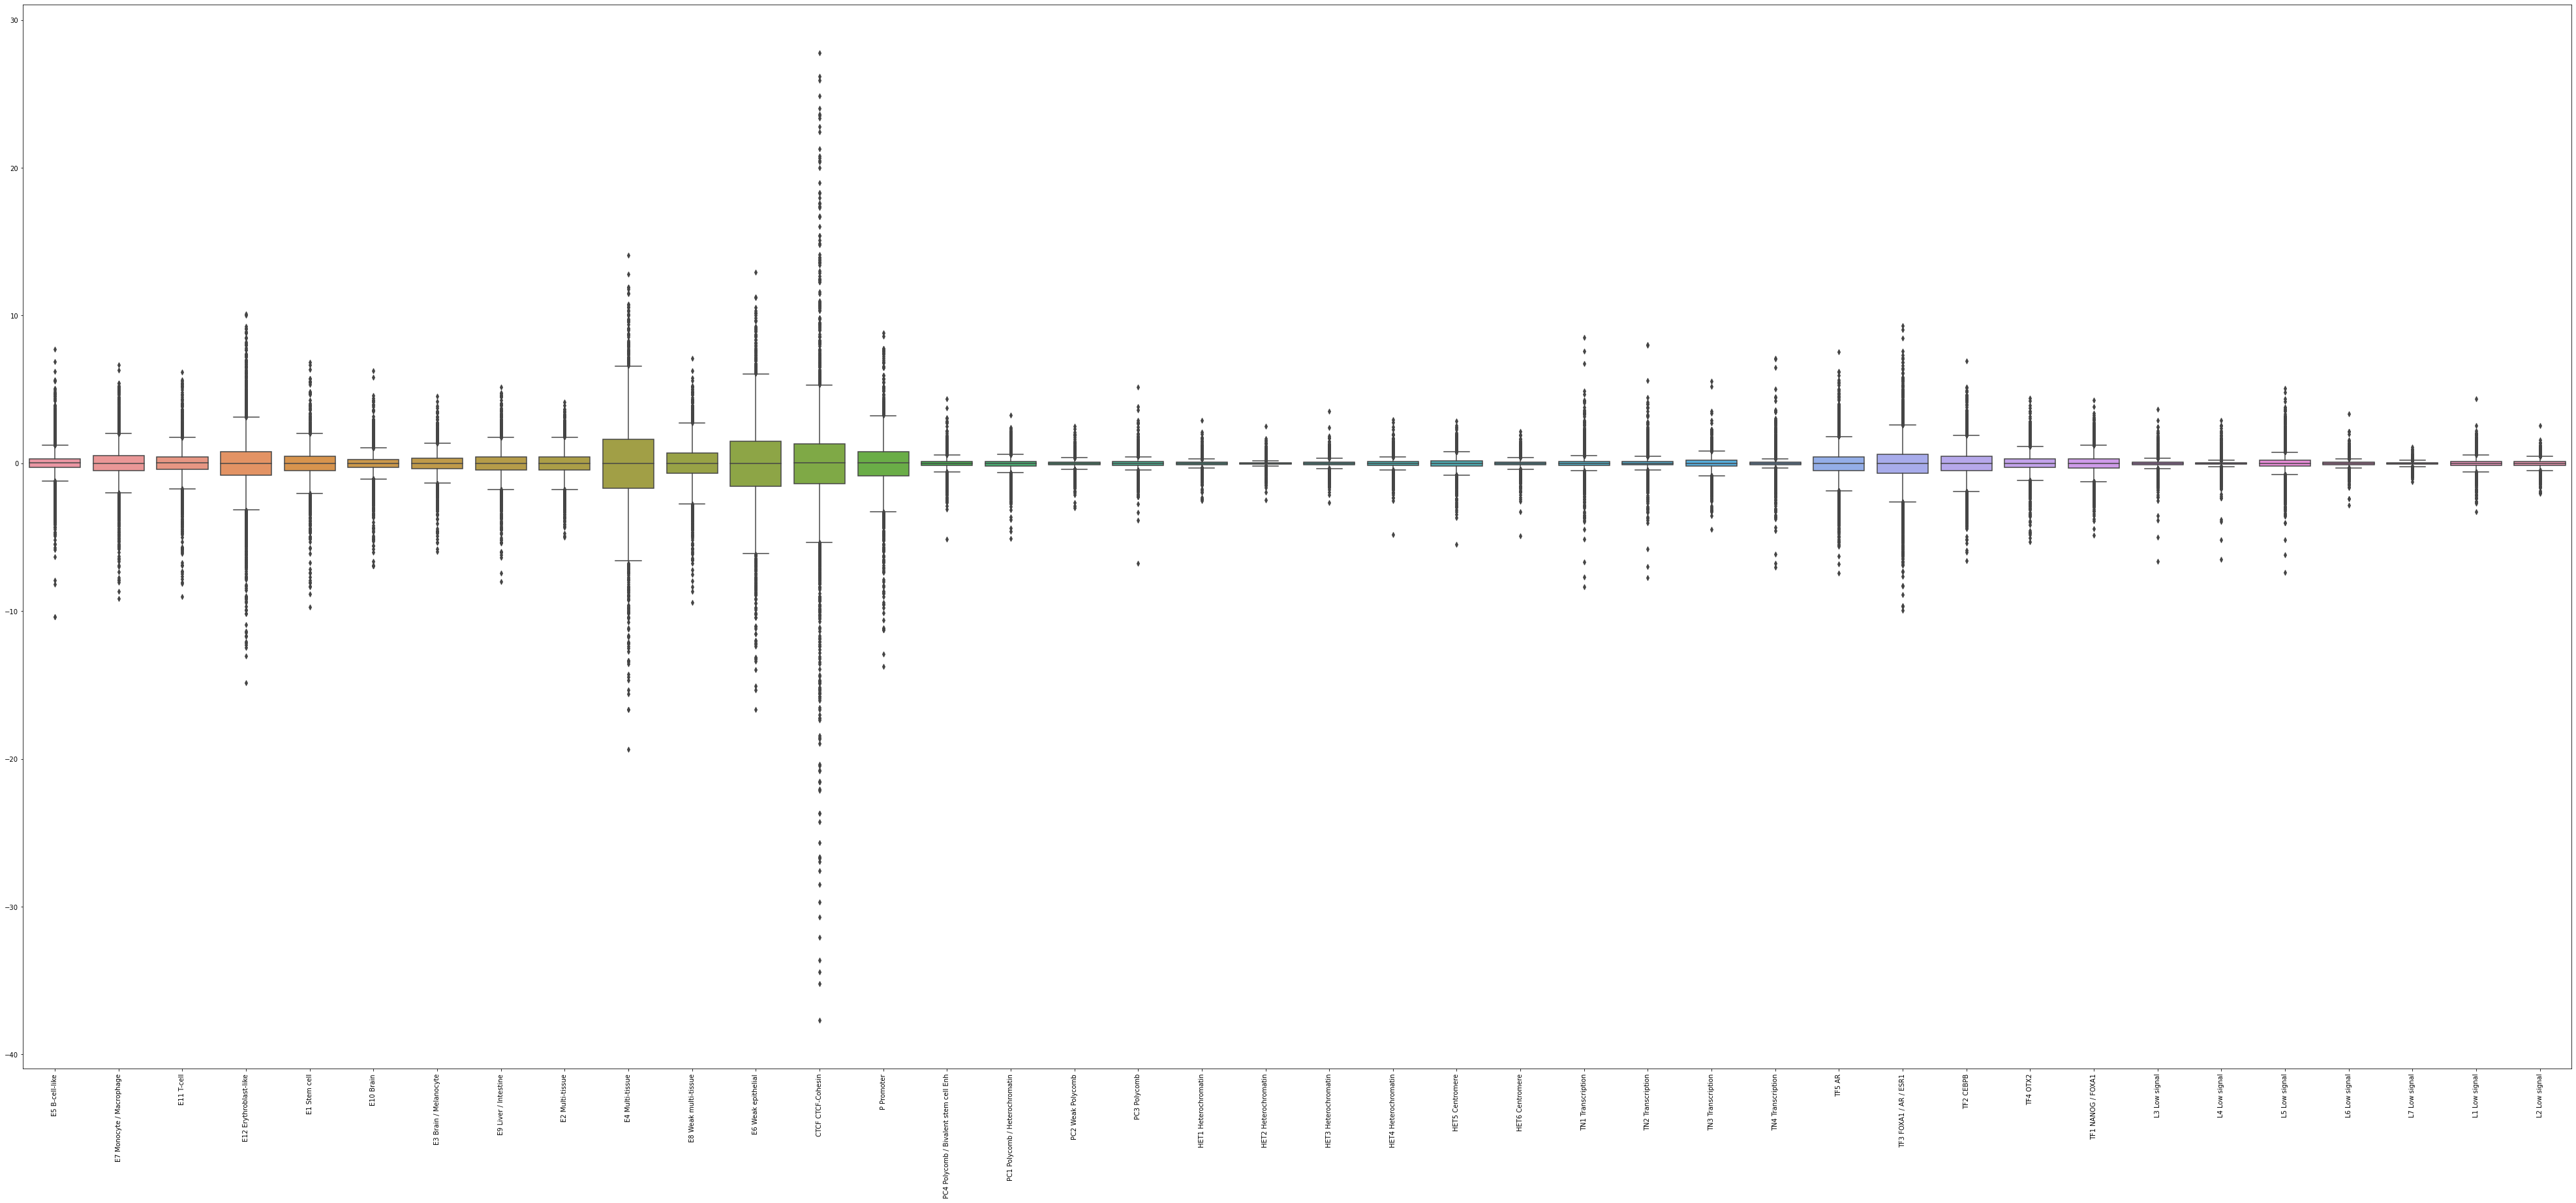

In [11]:
plt.figure(figsize=(70,30))
plt.xticks(rotation=90)
ax = sb.boxplot(data = matrix_0_01)